In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
mtcars=sm.datasets.get_rdataset("mtcars").data

In [46]:
#create a model using statsmodel.api as sm
x = mtcars.wt
x=sm.add_constant(x)
y = mtcars.mpg
model = sm.OLS(y,x).fit() #ordinary least squares in regression; fitting the machine on the data
pred_OLS = model.predict(x) #prediction basis on the learning obt


In [25]:
# fitted values,residual and R Squared
fittedvals=model.fittedvalues
residuals=model.resid
Rsq = model.rsquared #single number output

In [26]:
print(Rsq)

0.7528327936582646


In [27]:
sse=(sum(residuals**2))
sst=sum((y-y.mean())**2)
print(sse)
print(sst)
r_sq=1-(sse/sst)
print(r_sq)

278.32193754334327
1126.0471875
0.7528327936582646


In [28]:
from sklearn.linear_model import LinearRegression

In [42]:
lm=LinearRegression()

In [47]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
lm.predict(x)

array([23.28261065, 21.9197704 , 24.88595212, 20.10265006, 18.90014396,
       18.79325453, 18.20536265, 20.23626185, 20.45004071, 18.90014396,
       18.90014396, 15.53312687, 17.3502472 , 17.08302362,  9.22665041,
        8.29671236,  8.71892561, 25.52728871, 28.65380458, 27.47802083,
       24.11100374, 18.47258623, 18.92686632, 16.76235533, 16.73563297,
       26.94357367, 25.847957  , 29.19894068, 20.34315128, 22.48093991,
       18.20536265, 22.4274952 ])

In [32]:
from sklearn.metrics import r2_score

In [49]:
r2_score(y,lm.predict(x))

0.7528327936582646

# Using multiple x variables

In [81]:
x=mtcars.drop("mpg",axis=1)
x=sm.add_constant(x)
y = mtcars.mpg
model = sm.OLS(y,x).fit() #ordinary least squares in regression; fitting the machine on the data
pred_OLS = model.predict(x)

In [82]:
# fitted values,residual and R Squared
fittedvals=model.fittedvalues
residuals=model.resid
Rsq = model.rsquared

In [83]:
print(Rsq)

0.8690157644777647


In [84]:
multimodel = sm.OLS(y,x).fit() #ordinary least squares in regression; fitting the machine on the data
multi_pred = multimodel.predict(x)

In [85]:
fittedvals=multimodel.fittedvalues
residuals=multimodel.resid

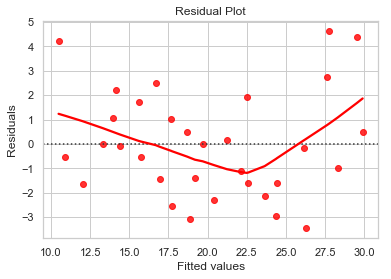

In [86]:
sns.set(style="whitegrid")
ax=sns.residplot(fittedvals,residuals,color='red',lowess=True)
ax.set(xlabel="Fitted values",ylabel="Residuals",title="Residual Plot")
plt.show()

Normal QQ Plot
Studentized Residuals aka standardized Residual = Residual/St.Deviation

In [87]:
import scipy.stats as stats
import pylab

In [88]:
#Find the standardized Residual
st_residual=multimodel.get_influence().resid_studentized_internal



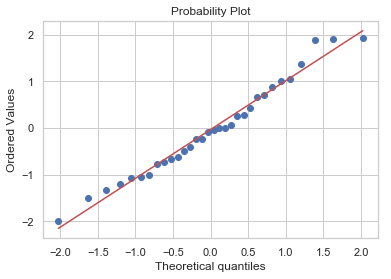

In [91]:
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

#the blue datapoints should go along the red line. Deviation denotes the data doesnot follow normal distribution

In [92]:
from scipy.stats import shapiro

In [102]:
test=shapiro(residuals)
test

(0.9569438099861145, 0.2261517345905304)

# Null hypothesis - Data Sample is following the Normal distribution
# Alternate Hypothesis - Data Sample is not following the Normal distribution

In [104]:
if test[1]<0.05:
    print("Reject the Null Hypothesis")
else:
    print("Fail to reject the Null Hypothesis")

Fail to reject the Null Hypothesis


In [105]:
data=pd.read_csv("concrete.csv")

In [106]:
data.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [129]:
x=data.drop("strength",axis=1)
#x=sm.add_constant(x)
x['age']=data.age
y = data.strength
model1 = sm.OLS(y,x).fit() #ordinary least squares in regression; fitting the machine on the data
pred_OLS = model1.predict(x)


In [127]:
fittedvals=model1.fittedvalues
residuals=model1.resid
Rsq = model1.rsquared
print(Rsq)

0.9313084829389178


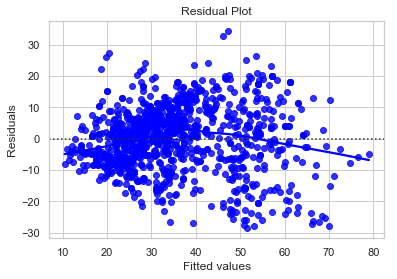

In [115]:
sns.set(style="whitegrid")
ax=sns.residplot(fittedvals,residuals,color='blue',lowess=True)
ax.set(xlabel="Fitted values",ylabel="Residuals",title="Residual Plot")
plt.show()

In [116]:
st_residual=model1.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

In [137]:
a=data[['superplastic','age']]
b=data.strength
model2 = sm.OLS(b,a).fit() #ordinary least squares in regression; fitting the machine on the data
pred_OLS = model2.predict(a)

In [138]:
fittedvals=model2.fittedvalues
residuals=model2.resid
Rsq = model2.rsquared
print(Rsq)

0.7600594163435805


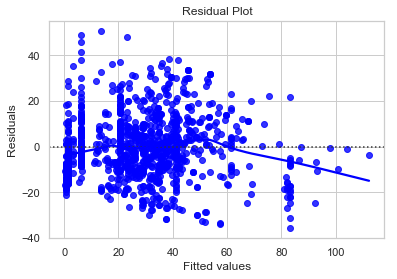

In [139]:
sns.set(style="whitegrid")
ax=sns.residplot(fittedvals,residuals,color='blue',lowess=True)
ax.set(xlabel="Fitted values",ylabel="Residuals",title="Residual Plot")
plt.show()

In [140]:
st_residual=model2.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()

In [146]:
#VIF - Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
x=data.drop("strength",axis=1)
y = data.strength
for i in range(1,x.shape[1]):
    VIF=variance_inflation_factor(x.values,i)
    print(VIF)

3.329127167858221
4.1478331464409814
82.1575690843567
5.4710937277294125
84.9557786410409
72.79099547091855
1.699459271414487


In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(0,x.shape[1])]

In [167]:
vif

VIF values
0   15.456717
1    3.329127
2    4.147833
3   82.157569
4    5.471094
5   84.955779
6   72.790995
7    1.699459

In [153]:
data.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [171]:
ce=['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age']

In [172]:
vif["Feature Names"] = ce

In [173]:
vif

VIF values Feature Names
0   15.456717        cement
1    3.329127          slag
2    4.147833           ash
3   82.157569         water
4    5.471094  superplastic
5   84.955779     coarseagg
6   72.790995       fineagg
7    1.699459           age

In [174]:
a=data[['slag','age','ash']]
b=data.strength
model2 = sm.OLS(b,a).fit() #ordinary least squares in regression; fitting the machine on the data
pred_OLS = model2.predict(a)

In [175]:
fittedvals=model2.fittedvalues
residuals=model2.resid
Rsq = model2.rsquared
print(Rsq)

0.7073532685115465


In [176]:
sns.set(style="whitegrid")
ax=sns.residplot(fittedvals,residuals,color='blue',lowess=True)
ax.set(xlabel="Fitted values",ylabel="Residuals",title="Residual Plot")
plt.show()

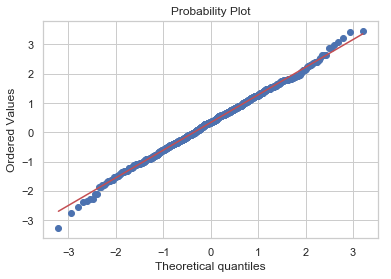

In [177]:
st_residual=model2.get_influence().resid_studentized_internal
stats.probplot(st_residual,dist="norm",plot=pylab)
plt.show()